<h1><center>HW2</center></h1>

104061172 張肇元

<h1>Implement</h1>

* 利用上課所學去實作一個機器學習的分類 model
* 改用不同的 dataset 這次是用車子的
* 運用 ski-learn 和最近新教的 training 方法去做二元分類
* 我把code 拆成一部分一部分去解釋我在寫這部分思考的事情

<h1>1.1 Code and Result</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
buying = {'vhigh': 4 , 'high': 3,'med' :2,'low' :1}
maintmap = {'vhigh': 4, 'high': 3,'med' :2,'low' :1}
doorsmap = {'2' : 2,'3': 3 ,'4': 4, '5more' : 5}
person = {'2' : 2,'4': 4, 'more' : 6}
lug_boot = {'small' :0,'med' : 1,'big' : 2}
safety = {'low' : 1,'med' : 2,'high' : 3}
classmap = {'unacc' : 0 , 'acc' :0 , 'good' :1 , 'vgood' :1}

這部分的 Code 主要是 import 之後會用到關於儲存資料的 library
還有對 data 進行 pre-processing 需要的 mapping value

In [2]:
name = ['buying','maint','doors','persons','lug_boot','safety','class_values']
df_car = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header = None, names = name)

這部分是把標題和讀 dataset

In [3]:
df_car['buying'] = df_car['buying'].map(buying)
df_car['maint'] = df_car['maint'].map(maintmap)
df_car['doors'] = df_car['doors'].map(doorsmap)
df_car['persons'] = df_car['persons'].map(person)
df_car['lug_boot'] = df_car['lug_boot'].map(lug_boot)
df_car['safety'] = df_car['safety'].map(safety)
df_car['class_values'] = df_car['class_values'].map(classmap)
data = df_car.iloc

對於 data 的 pre-processing 的第一步:
我們需要 data 是數字我們的 model 才能做分類，所以利用 map 這個函式去取代掉原本是英文的資料 

In [4]:
X = data[:,0:6]
y = data[:,[6]]

pre-processing 第二步:
把 label 和 data 分開

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify = y_train)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
T_test_std = sc.transform(X_test)
ei = sc.fit_transform(X_train)

這邊再導入兩個 library 做最後的 Data preprocessing 
我把 data 切成 6:2:2
再把每個 data 拿去 normalize

[0.94750334 1.04067575 1.03313544 1.00736929 0.99241038 0.98470291]


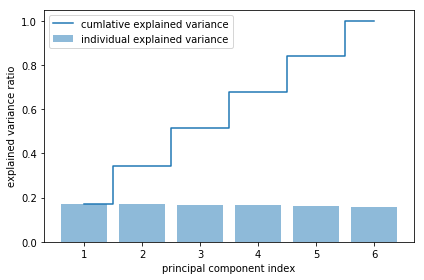

In [18]:
cov_mat = np.cov(ei.T)
eigen_vals , eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)
    
tot = sum(eigen_vals)
var_exp = [(i/tot)for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,7) , var_exp , alpha = 0.5 , align = 'center', label = 'individual explained variance')
plt.step(range(1,7),cum_var_exp, where = 'mid',label = 'cumlative explained variance')
plt.xlabel('principal component index')
plt.ylabel('explained variance ratio')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

拿到資料後，我的第一個想法是既然他有6種參數會影響 label ，那是不是有一些參數是可以棄用的，讓我可以去降為，結果發現每個參數都還蠻重要的。

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 11,eta0 = 0.1,random_state = 0)
ppn.fit(X_train_std,y_train)
train_pred = ppn.predict(X_train_std)
j = train_pred.size
train_pred.resize(j,1)
y_pred = ppn.predict(X_val_std)
k = y_pred.size
y_pred.resize(k,1)
print('ppn_training difference : %d' %(y_train != train_pred).sum())
print('ppn_training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
print('ppn_validation difference : %d' % (y_val != y_pred).sum())
print('ppn_validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

ppn_training difference : 37
ppn_training accuracy score : 0.96
ppn_validation difference : 11
ppn_validation accuracy score: 0.97


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


這邊主要去調的參數是 max_iter，我是根據 Validation data 的 accuracy score 去調的，在 max_iter = 11 時，有最好的 performance 。

In [8]:
from sklearn.linear_model import LogisticRegression
parameter_range = [0.001,0.01,0.1,1,10,100,1000]
for i in parameter_range:
    print(i)
    lr = LogisticRegression(C=10,random_state= 1)
    lr.fit(X_train_std,y_train)
    train_pred = lr.predict(X_train_std)
    j = train_pred.size
    train_pred.resize(j,1)
    y_pred = lr.predict(X_val_std)
    k = y_pred.size
    y_pred.resize(k,1)
    print('lr_training difference : %d' %(y_train != train_pred).sum())
    print('lr_training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
    print('lr_validation difference : %d' % (y_val != y_pred).sum())
    print('lr_validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

0.001
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
0.01
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
0.1
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
1
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
10
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
100
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97
1000
lr_training difference : 35
lr_training accuracy score : 0.97
lr_validation difference : 10
lr_validation accuracy score: 0.97


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


至於在 logistic regression 中，我是參考老師的講義去設定我的參數，可以看出去調 C 其實並不會太大的去影響 model 的 prediction 。

In [9]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=1,gamma= 'auto',C=10)
svm.fit(X_train_std,y_train)
train_pred = svm.predict(X_train_std)
y_pred = svm.predict(X_val_std)
j = train_pred.size
k = y_pred.size
train_pred.resize(j,1)
y_pred.resize(k,1)
print('training difference : %d' %(y_train != train_pred).sum())
print('training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
print('validation difference : %d' % (y_val != y_pred).sum())
print('validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

training difference : 1
training accuracy score : 1.00
validation difference : 0
validation accuracy score: 1.00


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


這邊我試過 Perceptron LogisticRegression 還有 rbf
到 rbf 就決定繼續做下一步，因為他在 validation 和 training 都有很高的performance

In [10]:
t_pred = svm.predict(T_test_std)
l = t_pred.size
t_pred.resize(l,1)
print('testing difference : %d' % (y_test != t_pred).sum())
print('testing accuracy score: %.2f' % accuracy_score(y_test, t_pred))

testing difference : 2
testing accuracy score: 0.99


最後是把 testing data 丟進去
發現這個 model 還不錯

<h1>Discussion</h1>

因為有學過程二，所以物件導向語言對我來說沒有到很困難，而且這次作業也不複雜，時間都花在查 document 上了，那在這次作業中，第一次有機會去實作真的 ML 的 model 覺得很厲害，很像黑魔法，雖然知道這是用數學模型去 fit 出來的結果，但是真的做出來很有成就感，另外在 call function 的時候覺得 sklearn 好像就是連尿布都幫我們包好了，我們要做的就是把 data 丟進去，經過一個黑盒子，就有 output 了
這是我第一次去 train 一個 model 雖然暑假的時候因為專題的方向，有先看一些關於 CNN 的課程，但是實際去做還是第一次。

<h1>1.2 Code and Result</h1>

* 更動 label
* code 部分幾乎和第一題實作的方法都非常類似


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
buying = {'vhigh': 4 , 'high': 3,'med' :2,'low' :1}
maintmap = {'vhigh': 4, 'high': 3,'med' :2,'low' :1}
doorsmap = {'2' : 2,'3': 3 ,'4': 4, '5more' : 5}
person = {'2' : 2,'4': 4, 'more' : 6}
lug_boot = {'small' :0,'med' : 1,'big' : 2}
safety = {'low' : 1,'med' : 2,'high' : 3}
classmap = {'unacc' : 0 , 'acc' :1 , 'good' :2 , 'vgood' :3}

修改 label

In [12]:
name = ['buying','maint','doors','persons','lug_boot','safety','class_values']
df_car = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header = None, names = name)
df_car['buying'] = df_car['buying'].map(buying)
df_car['maint'] = df_car['maint'].map(maintmap)
df_car['doors'] = df_car['doors'].map(doorsmap)
df_car['persons'] = df_car['persons'].map(person)
df_car['lug_boot'] = df_car['lug_boot'].map(lug_boot)
df_car['safety'] = df_car['safety'].map(safety)
df_car['class_values'] = df_car['class_values'].map(classmap)
data = df_car.iloc
X = data[:,0:6]
y = data[:,[6]]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify = y_train)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
T_test_std = sc.transform(X_test)

In [13]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 23,eta0 = 0.1,random_state = 0)
ppn.fit(X_train_std,y_train)
train_pred = ppn.predict(X_train_std)
j = train_pred.size
train_pred.resize(j,1)
y_pred = ppn.predict(X_val_std)
k = y_pred.size
y_pred.resize(k,1)
print('ppn_training difference : %d' %(y_train != train_pred).sum())
print('ppn_training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
print('ppn_validation difference : %d' % (y_val != y_pred).sum())
print('ppn_validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

ppn_training difference : 224
ppn_training accuracy score : 0.78
ppn_validation difference : 72
ppn_validation accuracy score: 0.79


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.linear_model import LogisticRegression
parameter_range = [0.001,0.01,0.1,1,10,100,1000]
for i in parameter_range:
    print('C = %f' %i)
    lr = LogisticRegression(C=10,random_state= 1)
    lr.fit(X_train_std,y_train)
    train_pred = lr.predict(X_train_std)
    j = train_pred.size
    train_pred.resize(j,1)
    y_pred = lr.predict(X_val_std)
    k = y_pred.size
    y_pred.resize(k,1)
    print('lr_training difference : %d' %(y_train != train_pred).sum())
    print('lr_training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
    print('lr_validation difference : %d' % (y_val != y_pred).sum())
    print('lr_validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

C = 0.001000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 0.010000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 0.100000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 1.000000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 10.000000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 100.000000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82
C = 1000.000000
lr_training difference : 190
lr_training accuracy score : 0.82
lr_validation difference : 63
lr_validation accuracy score: 0.82


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


看到 perceptron 和 logistic regression 的 performance 都比較普通，我開始思考是不是當要分的 calss 來到 4 個之後，用 linear 的 model 去train 是不是分不開 data，所以最後我想要用非線性的 rbf 去試試看。

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=1,gamma= 'auto',C=10)
svm.fit(X_train_std,y_train)
train_pred = svm.predict(X_train_std)
y_pred = svm.predict(X_val_std)
j = train_pred.size
k = y_pred.size
train_pred.resize(j,1)
y_pred.resize(k,1)
print('training difference : %d' %(y_train != train_pred).sum())
print('training accuracy score : %.2f' % accuracy_score(y_train,train_pred))
print('validation difference : %d' % (y_val != y_pred).sum())
print('validation accuracy score: %.2f' % accuracy_score(y_val, y_pred))

training difference : 3
training accuracy score : 1.00
validation difference : 4
validation accuracy score: 0.99


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


結果發現無論是 training 還是 validation 的 performance 還不錯，所以我打算用 SVC 中 kernel = rbf 當我的 model。
gamma 我這次就直接設計是 auto 了，它代表的是  1 / n_features和講義的 0.1 比起來我覺得算合理，所以我就沒有去動它了。同時 testing 的比 validation 的 performance 差一點是正常現象，因為有根據 validation 去調過參數，但是 testing 沒有，因為根據 testing 調過參數的話其實就是作弊了， testing 必須要是 unseen 才行。

In [16]:
t_pred = svm.predict(T_test_std)
l = t_pred.size
t_pred.resize(l,1)
print('testing difference : %d' % (y_test != t_pred).sum())
print('testing accuracy score: %.2f' % accuracy_score(y_test, t_pred))

testing difference : 7
testing accuracy score: 0.98


<h1>Discussion</h1>

第二次在 Code 部分幾乎相同，比較需要修改的地方只有 label ，同時因為我的 class_label 多了 2 個，所以分類出來的結果讓我感到: 啊! 黑魔法阿!因為在coding 上幾乎都是複製貼上第一次的 code 所以比較需要注意的地方只有 model ，因為在第二題中，用 linear model 去做 classifier 的 performance 想比第一題實在差太多了。而且可以看到在 testing 的 performance 雖然比 validation 稍差，但是仍然在一個很不錯的值，這是非常合理的現象。第二題主要看到了選擇 model 的重要性，因為不同的 model 算出來的 accuracy score 真的差太多了!還有每次要測的時候都要對 dataset 進行 normalization ， 之前傻傻不懂事，直接丟進去， performence 就非常的糟糕。